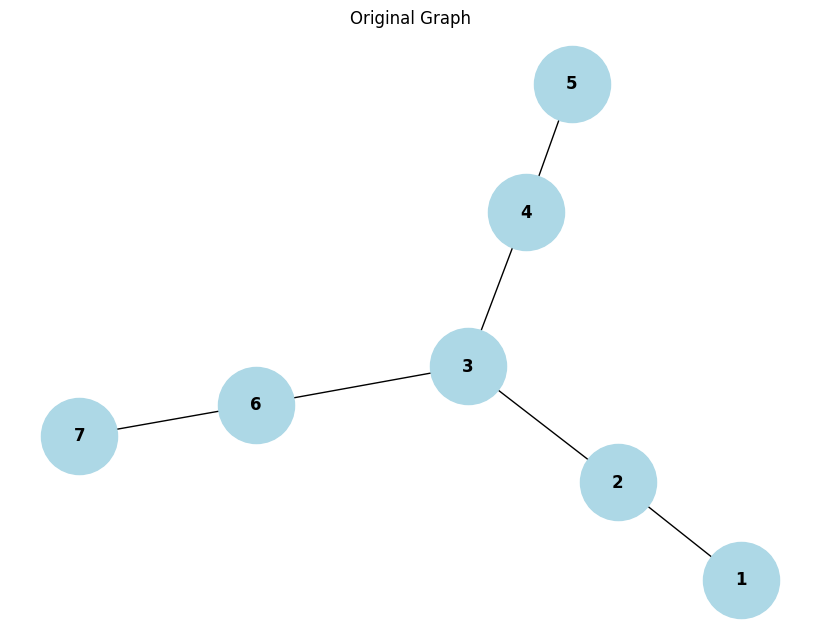

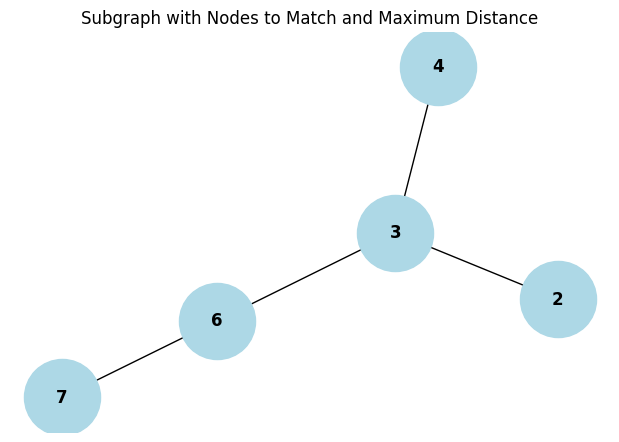

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def extract_subgraph(graph, nodes_to_match, max_distance):
    """
    Extracts a subgraph induced by the nodes and their neighbors within the specified maximum distance.

    Parameters:
    - graph (NetworkX Graph): The input graph.
    - nodes_to_match (list): A list of nodes for which the subgraph is extracted.
    - max_distance: The maximum distance to include neighbors in the subgraph.

    Returns:
    - subgraph (NetworkX Graph): The subgraph induced by the nodes and their neighbors within the specified distance.
    """

    # Create an empty set to store the nodes and their neighbors
    nodes_and_neighbors = set(nodes_to_match)

    # Iterate over each node in the list and find its neighbors within the maximum distance
    for node in nodes_to_match:
        # Calculate shortest paths from the current node to all other nodes
        shortest_paths = nx.single_source_shortest_path_length(graph, node)
        
        # Filter nodes based on distance
        neighbors = [n for n, distance in shortest_paths.items() if distance <= max_distance]
        
        # Add the node and its neighbors to the set
        nodes_and_neighbors.update(neighbors)

    # Extract the subgraph induced by the nodes and their chosen neighbors
    subgraph = graph.subgraph(nodes_and_neighbors)
    return subgraph

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (3, 6), (6, 7)])

# Nodes to match and desired maximum distance to include neighbors
nodes_to_match = [3, 6]
max_distance = 1

# Extract the subgraph
subgraph = extract_subgraph(G, nodes_to_match, max_distance)

# Plot the original graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')
plt.title('Original Graph')
plt.show()

# Plot the subgraph
subgraph_pos = nx.spring_layout(subgraph)
plt.figure(figsize=(6, 4))
nx.draw(subgraph, subgraph_pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')
plt.title('Subgraph with Nodes to Match and Maximum Distance')
plt.show()
